In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

Now how do you detect face and eyes?

In [14]:
img = cv2.imread('test_images\\ashik3.jpg')
if img is None:
    print("Can't find any image !!")
img.shape

(861, 853, 3)

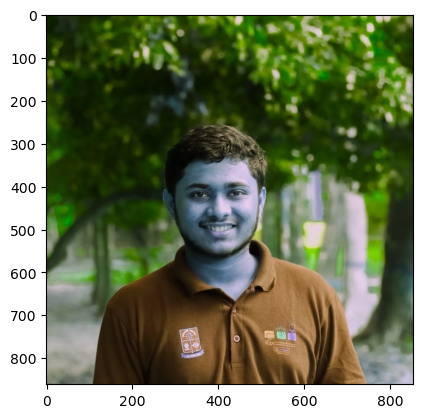

In [15]:
plt.imshow(img)

In [16]:
#The color is converting from BGR(Blue Green Red) to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(861, 853)

In [17]:
gray

array([[ 25,  24,  26, ...,  90,  90,  89],
       [ 24,  25,  26, ...,  94,  93,  93],
       [ 25,  24,  25, ...,  99,  99,  98],
       ...,
       [120, 120, 120, ..., 201, 203, 204],
       [117, 117, 117, ..., 201, 203, 204],
       [115, 115, 115, ..., 201, 203, 204]], dtype=uint8)

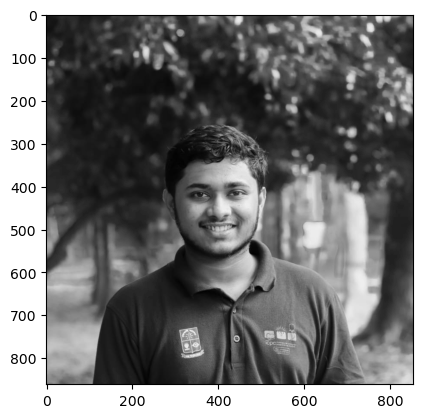

In [18]:
plt.imshow(gray, cmap='gray')

In [19]:
face_cascade = cv2.CascadeClassifier('opencv\\haarcascades\\haarcascade_frontalface_default.xml')
print(face_cascade)
eye_cascade = cv2.CascadeClassifier('opencv\\haarcascades\\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 9)
faces

< cv2.CascadeClassifier 0000016AF0983910>


array([[679, 600, 113, 113],
       [294, 334, 216, 216]])

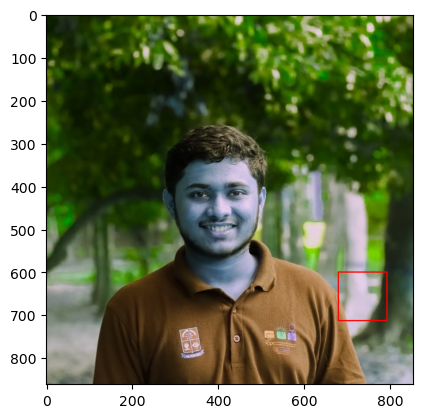

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

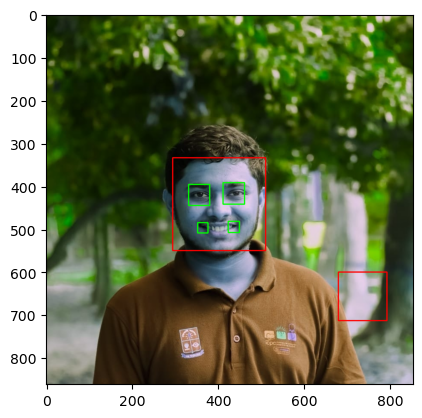

In [21]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

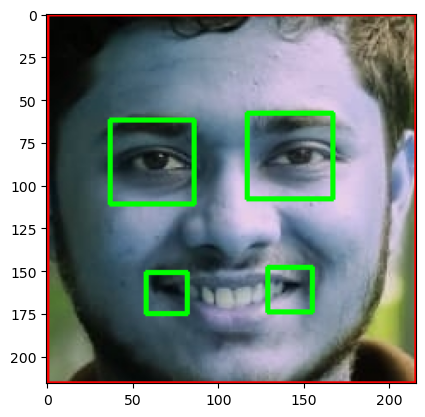

In [22]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [23]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        


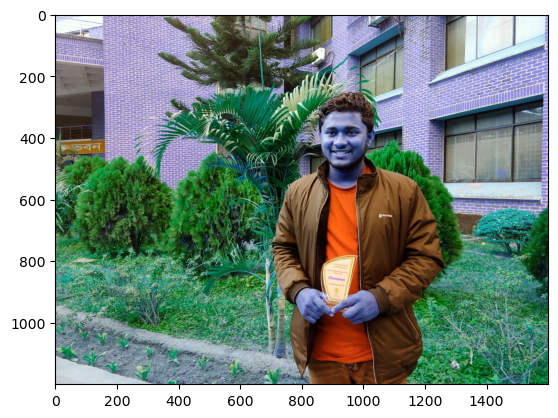

In [28]:
original_image = cv2.imread('test_images\\ashik2.jpg')
plt.imshow(original_image)

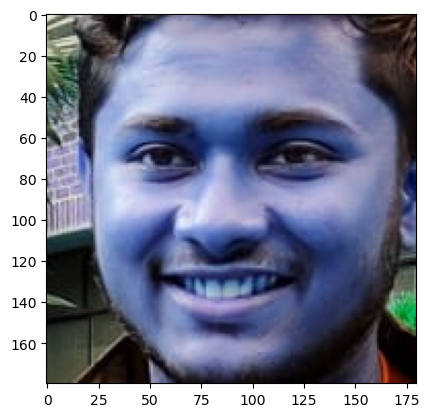

In [29]:
cropped_image = get_cropped_image_if_2_eyes('test_images\\ashik2.jpg')
plt.imshow(cropped_image)

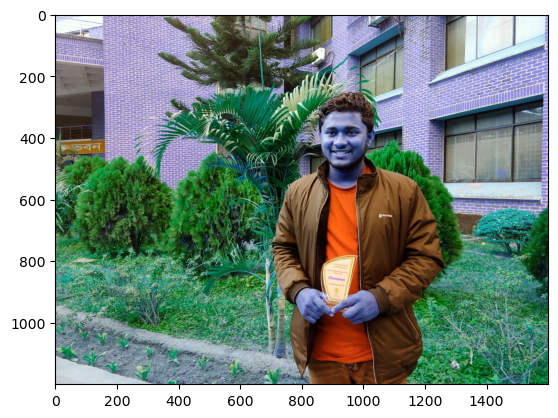

In [30]:
org_image_obstructed = cv2.imread('test_images\\ashik2.jpg')
plt.imshow(org_image_obstructed)

In [32]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('test_images\\ashik2.jpg')
cropped_image_no_2_eyes

array([[[199, 210, 200],
        [229, 236, 223],
        [234, 239, 224],
        ...,
        [ 55,  33,  27],
        [ 44,  22,  16],
        [ 34,  12,   6]],

       [[230, 236, 225],
        [236, 239, 224],
        [238, 241, 225],
        ...,
        [ 40,  18,  12],
        [ 33,  11,   5],
        [ 46,  24,  18]],

       [[236, 236, 222],
        [232, 232, 214],
        [218, 218, 200],
        ...,
        [ 30,   8,   2],
        [ 53,  31,  25],
        [ 89,  67,  62]],

       ...,

       [[ 63,  72,  52],
        [ 66,  72,  53],
        [ 67,  73,  54],
        ...,
        [ 15,   0,   0],
        [ 11,   0,   0],
        [  9,   0,   0]],

       [[ 65,  74,  54],
        [ 68,  74,  55],
        [ 68,  74,  55],
        ...,
        [ 25,   5,   0],
        [ 17,   3,   0],
        [ 13,   2,   0]],

       [[ 66,  75,  55],
        [ 69,  75,  56],
        [ 69,  75,  56],
        ...,
        [ 37,   8,   1],
        [ 27,   5,   0],
        [ 19,   4,   1]]

In [41]:
path_to_data = "dataset//"
path_to_cr_data = "dataset//cropped//"

In [42]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [43]:
img_dirs

['dataset//amrito',
 'dataset//ashik',
 'dataset//sahriar',
 'dataset//tazbiul',
 'dataset//zahid']

In [44]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [45]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

amrito
Generating cropped images in folder:  dataset//cropped//amrito
ashik
Generating cropped images in folder:  dataset//cropped//ashik
sahriar
Generating cropped images in folder:  dataset//cropped//sahriar
tazbiul
Generating cropped images in folder:  dataset//cropped//tazbiul
zahid
Generating cropped images in folder:  dataset//cropped//zahid
